<a href="https://colab.research.google.com/github/IrinaBoyarchukova/OsnovePython/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_4_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81_Matplotlib_%D0%B8_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Визуализация данных с Matplotlib и Seaborn
#Подключение библиотек и скриптов

# https://gbcdn.mrgcdn.ru/uploads/asset/4239337/attachment/720ebdb2f08b82d465f2405f9c7c9bdd.html

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Считываем датасет
df = pd.read_csv('bank_10.csv', sep=';')
df.sample(n=10)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,convert
6,12587,44,blue-collar,married,secondary,no,978,no,no,unknown,3,7,385,6,-1,0
4,29034,42,entrepreneur,married,secondary,no,46,no,no,cellular,2,2,1013,1,-1,0
8,30224,57,management,married,tertiary,no,297,no,no,cellular,5,2,633,1,-1,0
9,14888,34,blue-collar,married,primary,no,602,yes,no,cellular,16,7,680,1,-1,0
7,5828,31,services,divorced,secondary,no,-274,yes,no,unknown,26,5,283,1,-1,0
0,17100,42,management,divorced,secondary,no,284,no,no,cellular,25,7,1173,4,-1,0
2,35195,35,technician,married,secondary,no,883,yes,no,cellular,7,5,333,1,351,0
1,22678,58,blue-collar,married,unknown,no,9,no,no,cellular,25,8,50,23,-1,0
3,13117,59,retired,divorced,primary,no,830,no,yes,cellular,8,7,116,1,-1,0
5,44256,27,admin.,married,tertiary,no,2855,no,no,cellular,22,7,138,2,178,1


Стандартный синтаксис создания графика

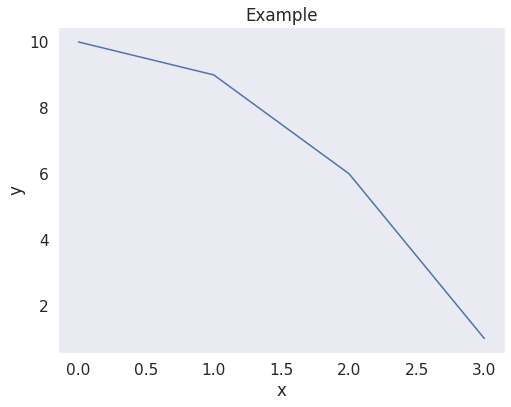

In [41]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

## Виды графиков
# Линейный график

In [52]:
# Готовим данные для графика в виде сводной таблицы

data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,2,2
1,5,2
2,7,5
3,8,1


Matplotlib - линейный график

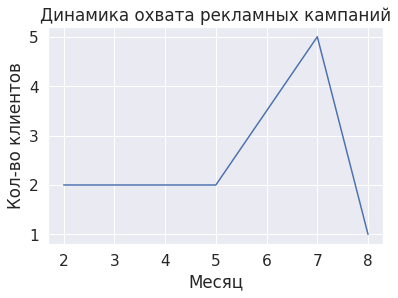

In [53]:
plt.figure(figsize=(6, 4)) # Задаем фигуру, размеры 

plt.plot(data['month'], data['count']) # От месяца и количество клиентов

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

# Seaborn иной метод линейного графика sns График такой же другая отрисовка

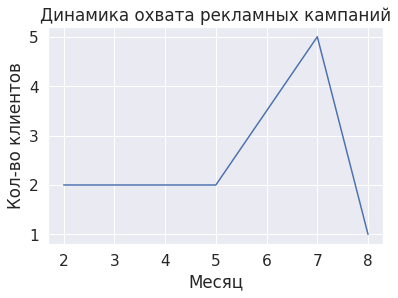

In [54]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

## Гистограмма
Matplotlib

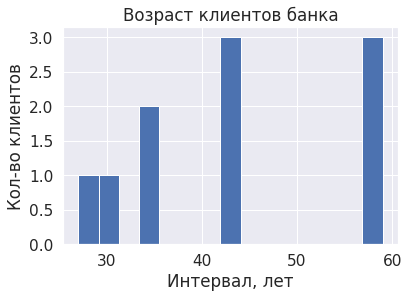

In [55]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов') ;

Seaborn

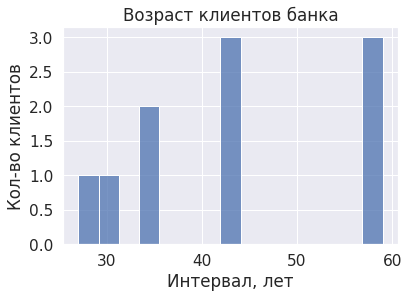

In [46]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

## Диаграмма рассеяния

In [57]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,27,1
1,31,0
2,34,0
3,35,0
4,42,0


Matplotlib

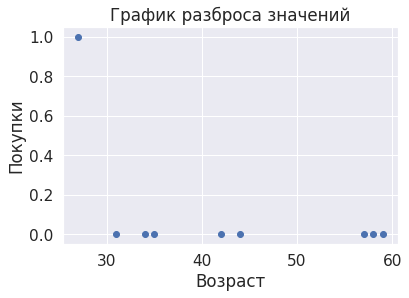

In [58]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

Seaborn

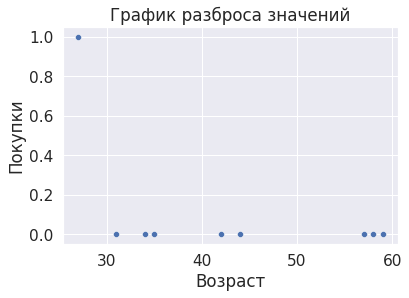

In [59]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

# Столбчатые диаграммы

In [60]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,3
1,management,2
2,technician,1
3,retired,1
4,entrepreneur,1


Matplotlib

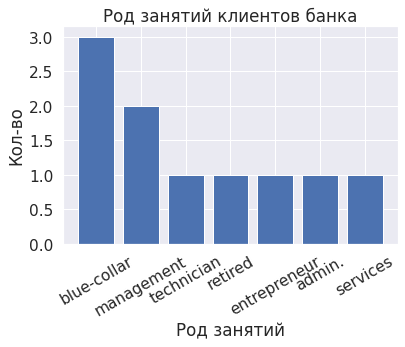

In [61]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

Seaborn

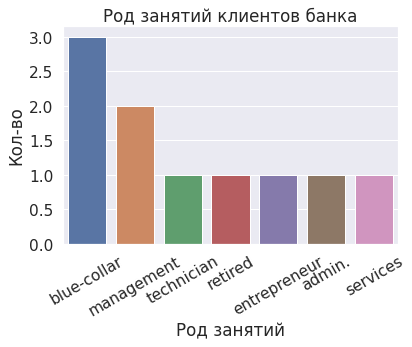

In [62]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30); #   атрибут наклона

Многорядовые столбчатые диаграммы

In [64]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()


convert,job,no,yes
1,blue-collar,3,0
3,management,2,0
2,entrepreneur,1,0
4,retired,1,0
5,services,1,0


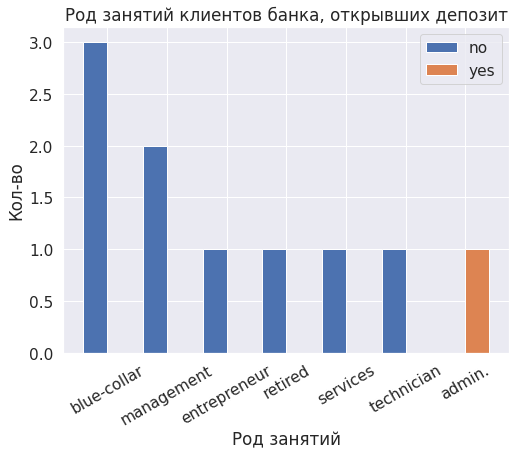

In [65]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

Сложенная столбчатая диаграмма

In [66]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,1.0,0.0
2,entrepreneur,1.0,0.0
3,management,1.0,0.0
4,retired,1.0,0.0
5,services,1.0,0.0


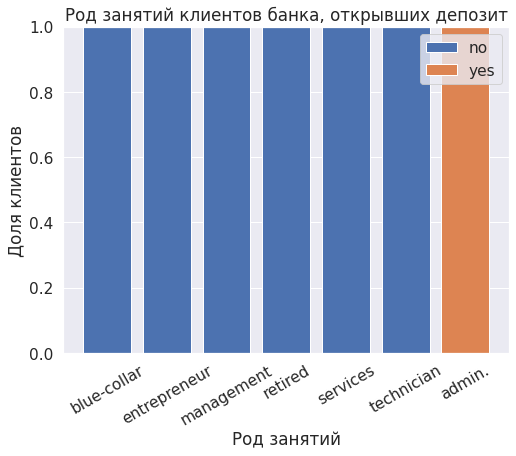

In [67]:
# Строим столбчатую многорядную сложенную диаграмму построчная нормализация

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

# Ящики с усами

In [68]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

5    138
Name: duration, dtype: int64

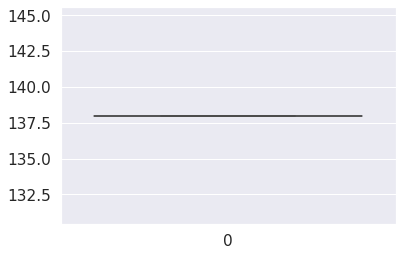

In [69]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

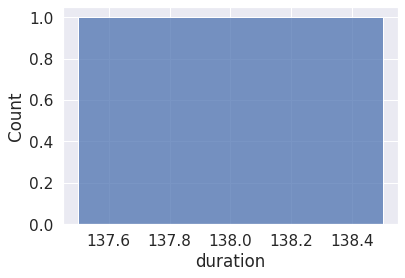

In [76]:
sns.histplot(x=data1); # Гистограмма

# Matplotlib

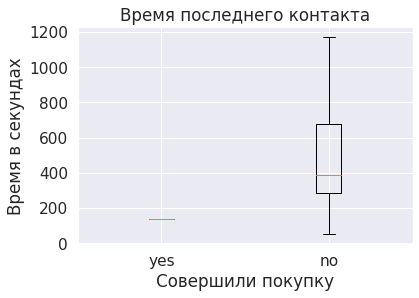

In [71]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

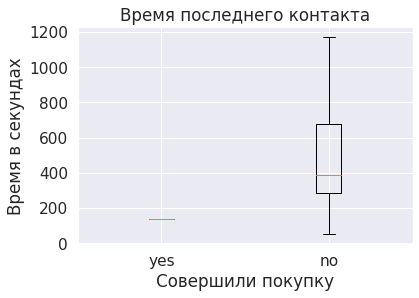

In [72]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False) # убрать выбросы

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

Seaborn

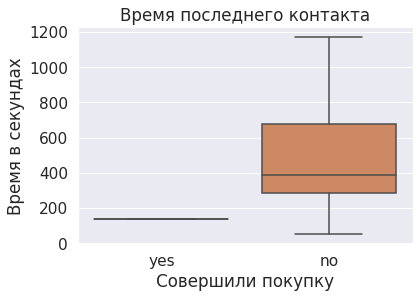

In [77]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no']);

Круговая диаграмма

In [74]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

no     9
yes    1
Name: convert, dtype: int64

Matplotlib

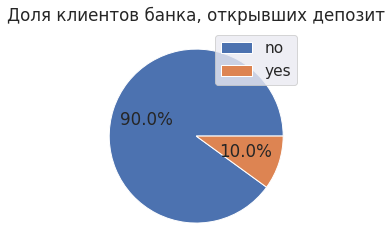

In [75]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

## Визуальный анализ данных
#Описание датасета

#Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

- longitude - долгота
- latitude - широта
- housing_median_age - средний возраст дома
- total_rooms - общее количество комнат
- total_bedrooms - общее количество спален
- population - количество проживающих
- households - домохозяйства
- ocean_proximity - близость океана
- median_income - средний доход
- median_house_value - средняя стоимость дома

In [79]:
df = pd.read_csv('housing.csv', sep=';')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value,ocean_proximity,INLAND
0,"-122,23","37,88",41,880,129,322,01.08.1952,452600,NEAR BAY,0
1,"-122,22","37,86",21,7099,1106,2401,01.08.2014,358500,NEAR BAY,0
2,"-122,24","37,85",52,1467,190,496,01.07.1974,352100,NEAR BAY,0
3,"-122,25","37,85",52,1274,235,558,01.05.1931,341300,NEAR BAY,0
4,"-122,25","37,85",52,1627,280,565,01.03.1962,342200,NEAR BAY,0


# Распределение вещественных признаков

# Категорийный {'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
# [0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)

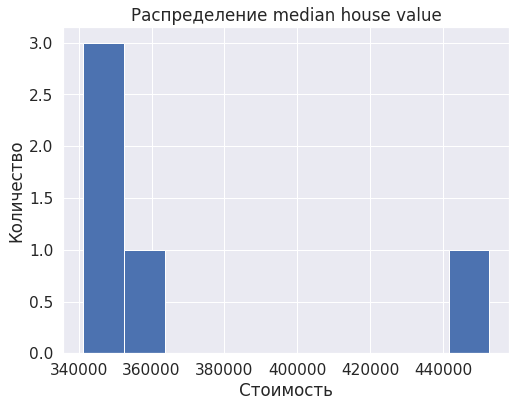

In [80]:
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'])
plt.title('Распределение median house value')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

In [81]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

KeyError: ignored

In [86]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

ValueError: ignored

# Поиск выбросов с помощью box plot

**Как строится box plot**

 ## Подробное объяснение

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы" - вариантов масса**

- среднее +/- 3 сигма (стандартное отклонение)
- min / max
- median +/- 1.5*(q75 - q25),
...
* Интерквартильный размах = q75 - q25

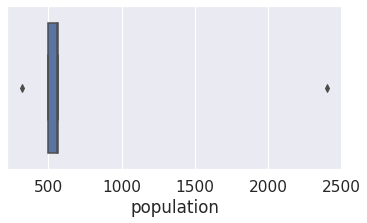

In [87]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

# Анализ категориальных признаков ( где строят докими)

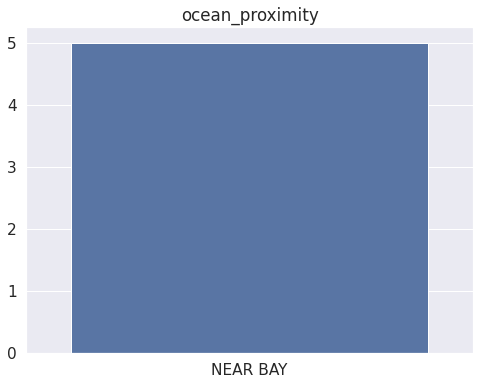

In [88]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

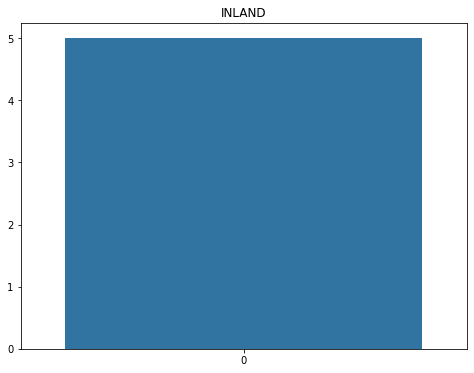

In [13]:
counts = df['INLAND'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('INLAND')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

# Анализ взаимных распределений

UFuncTypeError: ignored

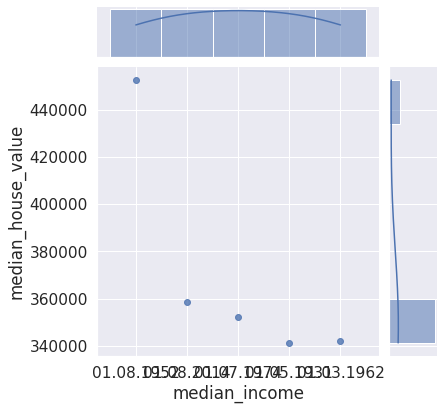

In [89]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg');

TypeError: ignored

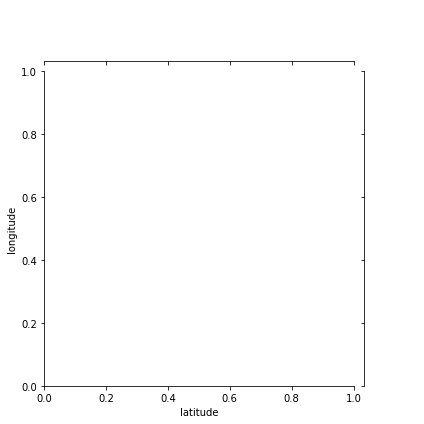

In [15]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde');

UFuncTypeError: ignored

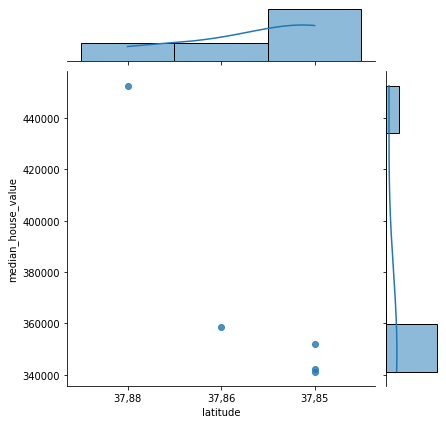

In [16]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg');

Видно два города, имеет смысл посмотреть на зависимость по отдельности

In [17]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

TypeError: ignored

In [18]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

TypeError: ignored

longitude

UFuncTypeError: ignored

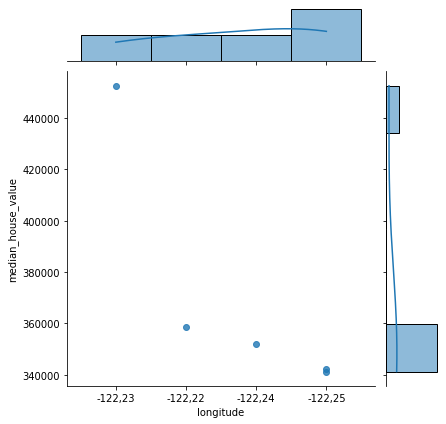

In [19]:
sns.jointplot(x=df['longitude'], y=df['median_house_value'], kind='reg');

In [20]:
df_cut = df[df['longitude'] < -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

TypeError: ignored

In [21]:
df_cut = df[df['longitude'] >= -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

TypeError: ignored

Категориальные / бинарные признаки
box plot

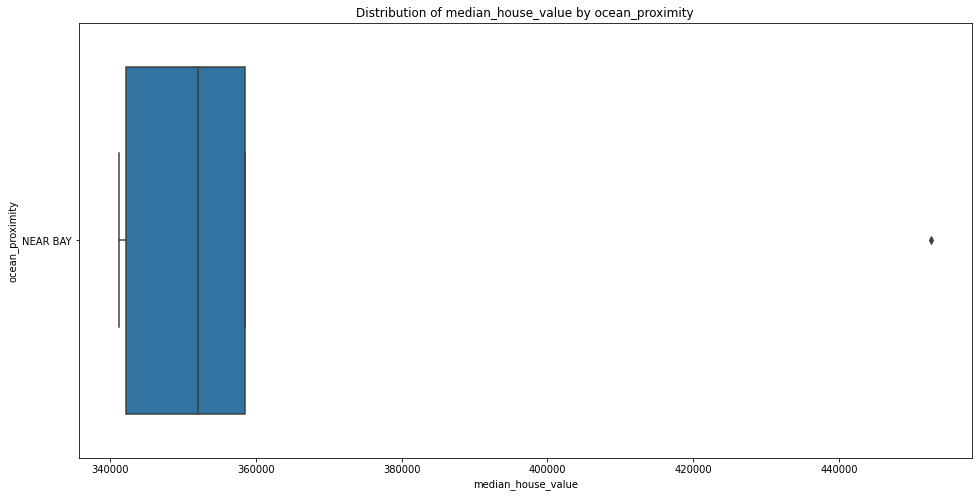

In [22]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

Как строится box plot

Подробное объяснение

box - от 25% до 75% квантиля
линия в середине box - медиана
"усы"
Как строятся "усы" - вариантов масса

среднее +/- 3 сигма (стандартное отклонение)
min / max
median +/- 1.5*(q75 - q25),
...
*Интерквартильный размах = q75 - q25

## Матрица корреляций
Показывает линейную связь между переменными
Изменяется от -1 до 1
Корреляция - мера только линейной связи

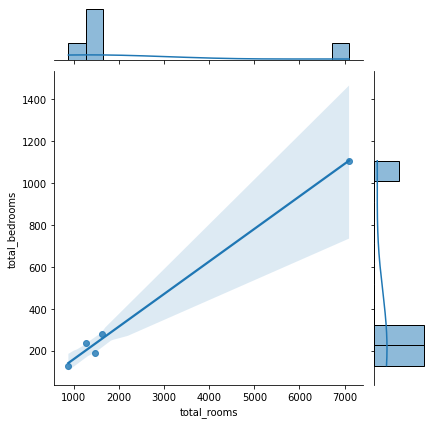

In [23]:
sns.jointplot(x=df['total_rooms'], y=df['total_bedrooms'], kind='reg');

UFuncTypeError: ignored

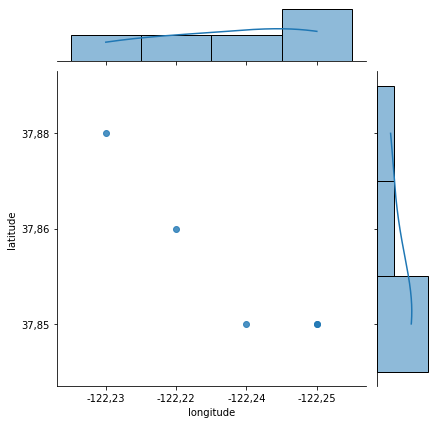

In [24]:
sns.jointplot(x=df['longitude'], y=df['latitude'], kind='reg');

In [25]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,housing_median_age,total_rooms,total_bedrooms,population,median_house_value,INLAND
housing_median_age,1.0,-0.9,-0.9,-0.9,0.0,NaN
total_rooms,-0.9,1.0,1.0,1.0,0.0,NaN
total_bedrooms,-0.9,1.0,1.0,1.0,0.0,NaN
population,-0.9,1.0,1.0,1.0,0.0,NaN
median_house_value,0.0,0.0,0.0,0.0,1.0,NaN
INLAND,NaN,NaN,NaN,NaN,NaN,NaN


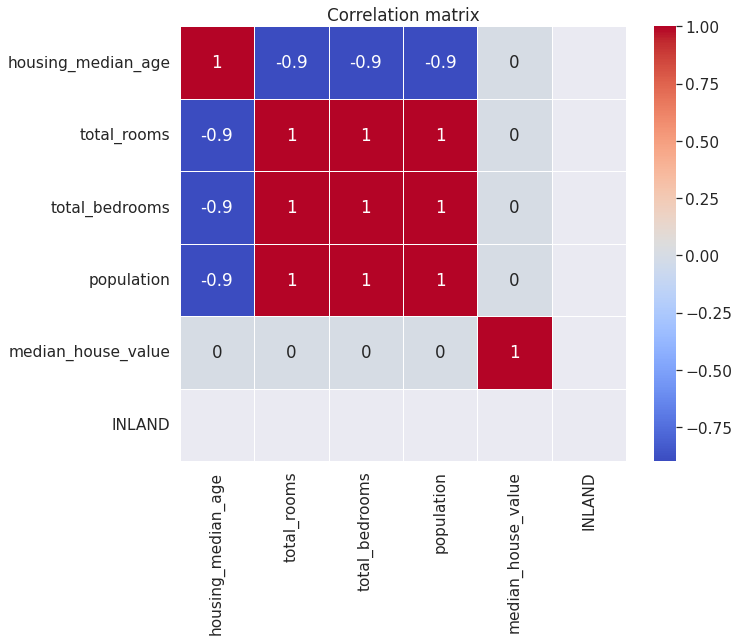

In [26]:
plt.figure(figsize=(10, 8)) # тепловая карта

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

## Гео данные

In [27]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05

In [28]:
import matplotlib.image as img
california_map = img.imread('California_Map.png')

plt.figure(figsize=(12, 9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

FileNotFoundError: ignored

NameError: ignored

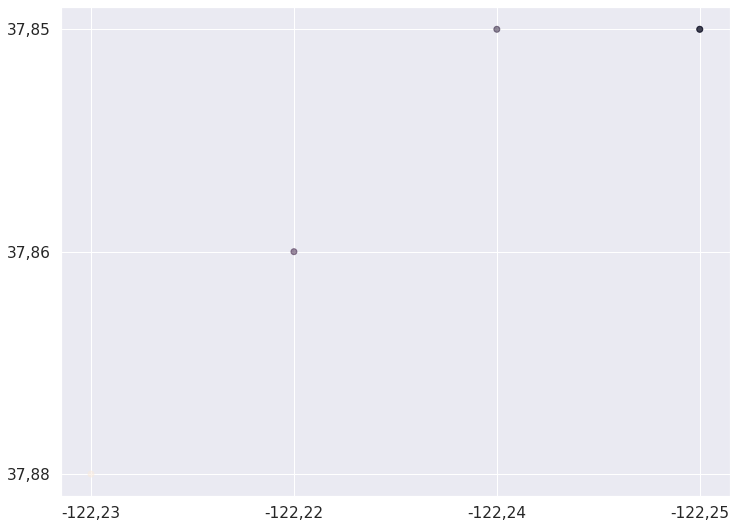

In [29]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");

# Folium

# !pip install folium

In [30]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        popup=point.median_house_value
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

ValueError: ignored

## Kepler** точки на карте

# !conda install -c conda-forge keplergl
# !pip install keplergl==0.1.1


In [31]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

ModuleNotFoundError: ignored

# Summary
1. Матрица корреляции
2. Знакомство с признаками
* Плотность распределения (sns.distplot/sns.kdeplot/plt.hist - Узнать распределение признака)
* sns.violinplot - Узнать распределение признака
* Столбчатая диаграмма (sns.barplot/plt.bar - Узнать распределение категориального признака)
* Ящик с усами (sns.boxplot/plt.boxplot - Узнать диапазон значений)
* sns.jointplot - Взаимное изменение признаков
* plt.pie - Изобразить долю объектов от всего кол-ва
# Поиск выбросов
- sns.distplot/sns.kdeplot/plt.hist - Искать хвосты слева и справа
- sns.boxplot - Всё, что выходит за пределы усов - выбросы
- Seaborn - https://seaborn.pydata.org/examples/index.html
- Matplotlib - https://matplotlib.org/3.1.0/gallery/index.html